## Low concentrations and stochasticity

We previously discussed that nano-molar concentrations correspond to 1 molecule per bacterium, micro-molar hence to 1000 molecules per bacterium. Signaling molecules in particular are often at low copy numbers and low numbers come with substantial stochasticity (or noise). Such noise due to low numbers is very common at the cellular levels. In these situations, it is important to think about numbers rather than concentrations!

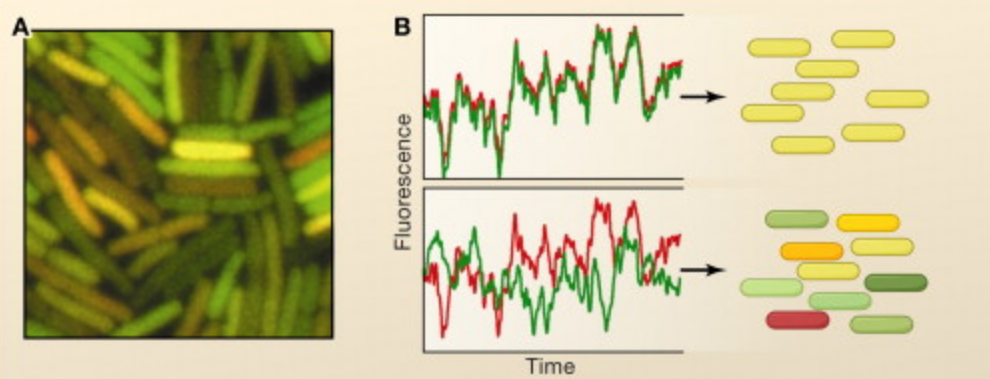

[Raj et al, Cell](https://www.cell.com/fulltext/S0092-86740801243-9)

Let's consider a simple model were molecules of a certain type are produced and decay:

$$
\begin{split}
	n &\rightarrow n+1 \quad \mathrm{with\ rate}\ b \\
	n &\rightarrow n-1 \quad \mathrm{with\ rate}\ nd
\end{split}
$$

When $b = nd$ production and decay cancel each other out on average. We therefore expect that the mean number of molecules is 
$$
\bar{n} = \frac{b}{d}
$$
But what about the fluctuations? Some of you might know the answer, but we will explore this here step-by-step using the computer.


### Side-note: Random number generation
Computers can't generate truly random numbers, by there are many libraries that generate pseudo-random numbers which are good enough for us

In [4]:
import numpy as np

# numpy has a submodule called 'random'
# the following generates a random number between 0 and 1
print("One random number in [0-1):", np.random.random())

print("5 random numbers in [0-):", np.random.random(size=5))


One random number in [0-1): 0.7024401507159773
5 random numbers in [0-): [0.69595801 0.26454065 0.1810465  0.87225031 0.44315535]


In [5]:
# there are many functions within this module
print("Random integer between 0,10:", np.random.randint(0,10))

Random integer between 0,10: 2


counts in bins [ 4. 15.  8.  9.  8. 18. 10.  5. 15.  8.]


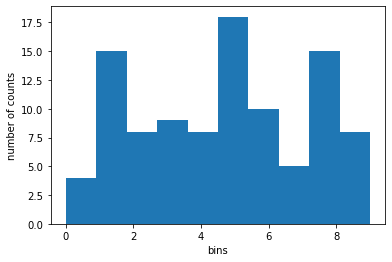

In [6]:
# a histogram of random numbers between 0 and 10 confirms this is uniform
import matplotlib.pyplot as plt

n = 100
random_numbers = np.random.randint(0,10,size=n)
y, x, lines = plt.hist(random_numbers, bins=10)
plt.ylabel('number of counts')
plt.xlabel('bins')
print("counts in bins",y)

## Back to our simple model
$$
\begin{split}
	n &\rightarrow n+1 \quad \mathrm{with\ rate}\ b \\
	n &\rightarrow n-1 \quad \mathrm{with\ rate}\ nd
\end{split}
$$

We will simulate this using random number generators! To do so, lets consider the changes to $n$ when proceeding in small time steps $\Delta t$. If these steps are small, most of the time nothing happens, but

$$
\begin{split}
	n &\rightarrow n+1 \quad \mathrm{with\ probability}\ b\Delta t \\
	n &\rightarrow n-1 \quad \mathrm{with\ probability}\ nd\Delta t
\end{split}
$$

Mean: 7.162383761623838


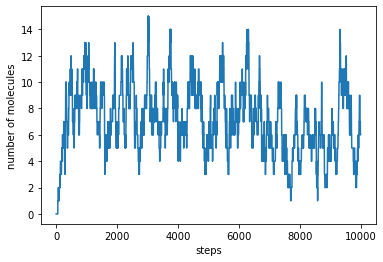

In [7]:
n = 0
b = 7
d = 1
Delta_t = 0.01
t_max = 100
t = 0


trajectory = [n]

while (t<t_max):
    p = np.random.random()  # random number between 0 and 1
    if (b*Delta_t>p):
        n += 1

    p = np.random.random()  # random number between 0 and 1
    if (n*d*Delta_t>p):
        n -= 1
        
    t += Delta_t
    trajectory.append(n)

plt.plot(trajectory)
plt.ylabel('number of molecules')
plt.xlabel('steps')
print("Mean:", np.mean(trajectory))

The simulation above makes a few approximations and for example assumes that in one time step $\Delta t$ at most one molecule is produced or destroyed. This is not a big problem if the probability of these events is low, but something one has to keep in mind!

The problem is simple enough, that we can actually solve it exactly. What we would like to know is the probability $p(n)$ to observe $n$ molecules at a randomly chosen time.
At steady state, the probability of being at state $n-1$ and moving to state $n$ should be balanced by the reverse:

$$
p(n-1) b = dn p(n) \quad \Rightarrow \quad p(n) = \frac{b}{dn}p(n-1)
$$

This condition has a simple solution:
$$
	p(n) = \frac{(b/d)^n}{n!}e^{-b/d}
$$
This distribution is known as the Poisson distribution, where $n!=n(n-1)(n-2)\ldots 1$ is the factorial.

It has mean $\bar{n} = b/d$ and variance $\sigma^2 = \bar{n}$

### Dig deeper:
 * In the histogram of random numbers between 0 and 10, what are the fluctuations you expect in each bin? Explore how they depend on $n$! If you know the answer, verify it by simulation!
 * Explore what happens if you change $b$ and $d$ in the simulation? At what point does the simulation become inaccurate?
 * Calculate the mean and variance of $n$ analytically!